# Example of loading txt from s3 and processing using re

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation. Furthermore, make sure you have the following packages installed:

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import pprint

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

In [2]:
import os

from uniflow.flow.client import ExtractClient
from uniflow.flow.config import ExtractTxtConfig
from uniflow.viz import Viz
from uniflow.flow.flow_factory import FlowFactory

FlowFactory.list()

/home/ubuntu/anaconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'extract': ['ExtractHTMLFlow',
  'ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow'],
 'rater': ['RaterFlow']}

### Configure the AWS CLI

Prepare Credentials: 
- AWS_ACCESS_KEY_ID
- AWS_SECRET_ACCESS_KEY
- AWS_REGION

Configure the AWS CLI - `aws configure` 

https://docs.aws.amazon.com/cli/latest/userguide/cli-chap-configure.html

### Prepare input data regarding s3 bucket and key

In [3]:
data = [{"filename": "s3://uniflow-test/test.txt"}]

In [4]:
client = ExtractClient(ExtractTxtConfig())

In [5]:
output = client.run(data)

100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


### Output

Let's take a look of the generation output.

In [6]:
pprint.pprint(output[0]['output'][0]['text'])

["One of the most important things I didn't understand about the world when I "
 'was a child is the degree to which the returns for performance are '
 'superlinear.',
 'Teachers and coaches implicitly told us the returns were linear. "You get '
 'out," I heard a thousand times, "what you put in." They meant well, but this '
 "is rarely true. If your product is only half as good as your competitor's, "
 "you don't get half as many customers. You get no customers, and you go out "
 'of business.',
 "It's obviously true that the returns for performance are superlinear in "
 'business. Some think this is a flaw of capitalism, and that if we changed '
 'the rules it would stop being true. But superlinear returns for performance '
 "are a feature of the world, not an artifact of rules we've invented. We see "
 'the same pattern in fame, power, military victories, knowledge, and even '
 'benefit to humanity. In all of these, the rich get richer.',
 "You can't understand the world without und

In [7]:
graph = Viz.to_digraph(output[0]["root"])

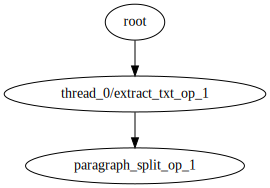

In [8]:
display(graph)

## End of the notebook

Check more Uniflow use cases in the [example folder](https://github.com/CambioML/uniflow/tree/main/example/model#examples)!

<a href="https://www.cambioml.com/" title="Title">
    <img src="../image/cambioml_logo_large.png" style="height: 100px; display: block; margin-left: auto; margin-right: auto;"/>
</a>